
## Load world ocean atlas, compute upper ocean thermal stratification


In [1]:
%matplotlib inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
np.seterr(divide='ignore')
from netCDF4 import Dataset

datadir='./'

In [2]:
# load uv for one constituent


fname = datadir+'woa13_decav_t00_01v2.nc'
print 'Load '+fname
#
nc = Dataset(fname,'r')
T = nc.variables['t_oa'][0,:]
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]
z = -nc.variables['depth'][:]
nc.close()

print 'Nz = %i, Nlon= %i, Nlat =%i' %(z.size, lon.size, lat.size)

# compute dTdz
dTdz = np.diff(T,axis=0)/np.diff(z)[0,None,None]
zmid = (z[1:]+z[:-1])*.5

# average absolute value in upper part
iupper = np.where( zmid > -500. )[0]
dTdz_upper = np.abs(dTdz[iupper,:,:]).mean(axis=0)


Load ./woa13_decav_t00_01v2.nc
Nz = 102, Nlon= 360, Nlat =180


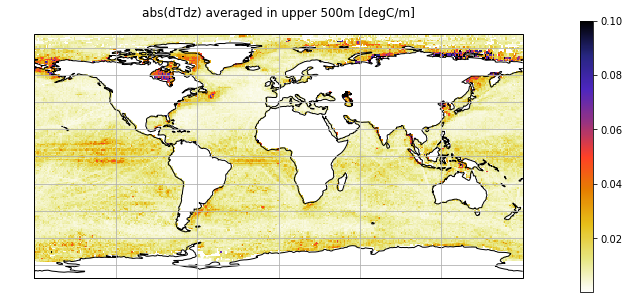

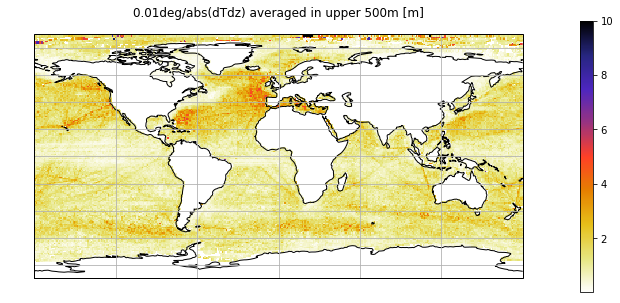

In [3]:
### plot a map of current amplitudes

plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
toplt = dTdz_upper
#toplt[toplt<1.] = 0.
#toplt = np.log10(toplt)
hdl = ax.pcolormesh(lon,lat,toplt, vmax=0.1, \
                    transform = ccrs.PlateCarree(),cmap=plt.get_cmap('CMRmap_r'))
ax.coastlines(resolution='110m')
ax.gridlines()
plt.colorbar(hdl,ax=ax)
ax.set_title('abs(dTdz) averaged in upper 500m [degC/m]')
plt.show()


plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
toplt = 0.01/dTdz_upper
#toplt[toplt<1.] = 0.
#toplt = np.log10(toplt)
hdl = ax.pcolormesh(lon,lat,toplt, vmax=10.,\
                    transform = ccrs.PlateCarree(),cmap=plt.get_cmap('CMRmap_r'))
ax.coastlines(resolution='110m')
ax.gridlines()
plt.colorbar(hdl,ax=ax)
ax.set_title('0.01deg/abs(dTdz) averaged in upper 500m [m]')
plt.show()

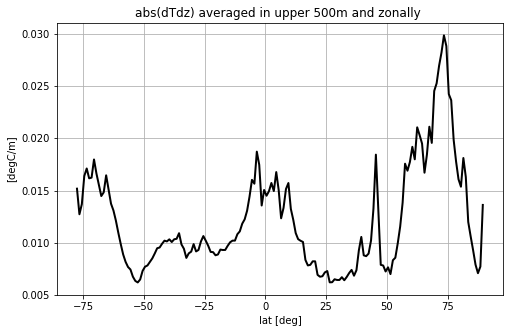

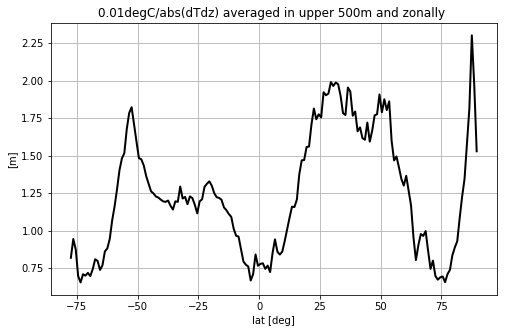

In [4]:
### same but averaged zonally

plt.figure(figsize=(8.,5.))
ax = plt.gca()
ax.plot(lat,dTdz_upper.mean(axis=1),'k',lw=2.)
ax.grid()
ax.set_title('abs(dTdz) averaged in upper 500m and zonally ')
ax.set_xlabel('lat [deg]')
ax.set_ylabel('[degC/m]')


plt.figure(figsize=(8.,5.))
ax = plt.gca()
ax.plot(lat,(.01/dTdz_upper).mean(axis=1),'k',lw=2.)
ax.grid()
ax.set_title('0.01degC/abs(dTdz) averaged in upper 500m and zonally ')
ax.set_xlabel('lat [deg]')
ax.set_ylabel('[m]')

